# 04 - Diskretna fourierova transofrmacija
<p style="font-weight: 600; text-align: center;">
Matematično-fizikalni praktikum, november 2023 <br>
Luka Skeledžija, 28201079
</p>

<style>
.MJXc-display{
    display: inline-block !important;
    width: 100%;
}
@media print {
    .pagebreak { page-break-before: always; } /* page-break-after works, as well */
}

img{
    width: 100%;
    max-width: 600px !important;
    margin: auto !important;
}

body {
    overflow: hidden;
    max-width: 600px;
    margin: auto;
}

::-webkit-scrollbar {
  width: 0px;
}

table{
    width: 100%;
}

h1 {
    text-transform: uppercase;
    text-align: center;
    background: #222222;
    color: white;
    padding: 8px;
}

blockquote {
    margin-left: 0em!important;
    margin-right: 0em!important;

}

.jp-RenderedHTMLCommon pre, .jp-RenderedHTMLCommon code {

    background-color: var(--jp-layout-color2)!important;
}

.jp-RenderedHTMLCommon pre{
    margin: 0.5em 0em!important;
    padding: 0em 1.5em!important;
}

body {
    counter-reset: h2counter;
}
h1 {
    counter-reset: h2counter;
}
h2:before {
    content: counter(h2counter) ".\0000a0\0000a0";
    counter-increment: h2counter;
    counter-reset: h3counter;
}
h3:before {
    counter-increment: h3counter;
    content: counter(h2counter) "." counter(h3counter) ".\0000a0\0000a0";
  
}




</style>


---

## Uvod

...

## Naloga


In [ ]:
# Standardized imports for MFPR
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
from IPython.display import HTML, display
import markdown
import datetime
import scipy.special as sp
import scipy.stats as stats
import scipy.optimize as opt
import scipy.interpolate as interp
from matplotlib import animation
import logging
import timeit
# Function and constants defitition for Juptyer notebook (rerun for hot reload of imports)

#plt.rcParams['figure.dpi'] = 300
plt.rcParams['text.usetex'] = True
plt.rcParams["grid.linestyle"]="dashed"
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

def log_msg(msg, log_filename='my_log_file.log'):
    # Configure the logging module if not already configured
    if not logging.root.handlers:
        logging.basicConfig(
            filename=log_filename,
            level=logging.DEBUG,
            format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
        )

    # Create a logger for the function (you can replace 'my_function' with your desired logger name)
    logger = logging.getLogger('EIGENSTATES')

    # Log the provided message
    logger.info(msg)
def clear_log_file(log_filename='my_log_file.log'):
    with open(log_filename, 'w'):
        pass

def centerHTML(html, text=""):
    text = markdown.markdown(text)
    return '<div style="display: flex; align-items: center; flex-direction: column;">' + html + f'</div><div style="display: flex; align-items: center; flex-direction: column;padding-top: 15px;"><small style="max-width: 600px">{text}</small></div>'

def insertHTMLVideo(filename, text=""):
    return centerHTML(f'<video controls src="{filename}" style="max-width: 600px;width:100%"></video>', text)

def insertHTMLAudio(filename, text=""):
    return centerHTML(f'<audio controls src="{filename}" style="max-width: 600px;width:100%"></audio>', text)


clear_log_file()
log_msg('START logging...')


## Diskretna Fourierova transformacija

In [ ]:
# DFT settings
delta = 50
smpl_freq = 1 / delta
critical_freq = 1 / (2*delta)

### Gaussova porazdelitev

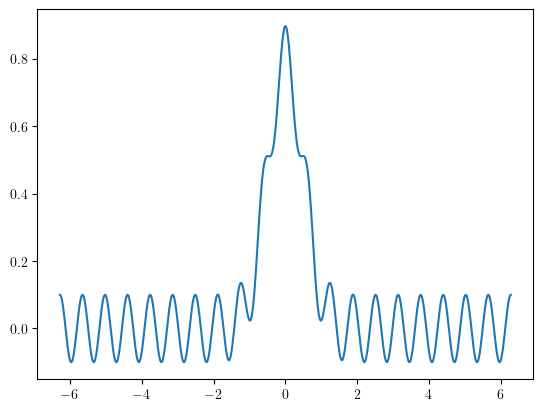

time_diff: 0.025132741228718346
sample_freq: 39.78873577297383


/Users/luka/.pyenv/versions/3.11.2/envs/phys/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/luka/.pyenv/versions/3.11.2/envs/phys/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


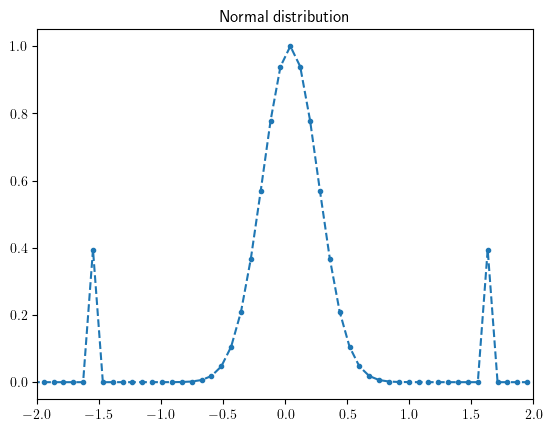

In [102]:
def sample(t, f, samples):
    t_k = np.linspace(t[0], t[-1], samples, endpoint=False)
    h_k = f(t_k)
    delta = np.abs(t[-1] - t[0]) / samples
    print('time_diff:', delta)
    print('sample_freq:',1/delta)
    return t_k, h_k, delta

t = np.linspace(-2*np.pi, 2*np.pi, 1000)

#my_sin = lambda x: np.cos(10*x)
my_sin = lambda x: stats.norm.pdf(x, scale=0.5) + 0.1 * np.cos(10*x)

sin_c = my_sin(t)

plt.plot(t, sin_c)
plt.show()

# Sample for DFT

def DFT(t, f, samples):
    t_k, h_k, delta = sample(t, f, samples)
    # h_k is sampled function
    N = len(h_k)
    n_k = np.arange(0, N)
    k_k = np.arange(0, N)
    H_n = []
    for n in n_k:       
        out = 0
        for h, k in zip(h_k, k_k):
            out += h * np.exp(2*np.pi*1j*n*k / N) 
        H_n.append(delta * out)
    T_n = n_k / ( N * delta)
    T_n = T_n  - T_n[-1] / 2
    width = len(H_n) // 2
    H_n = np.roll(np.array(H_n), width)
    return T_n, H_n, delta

samples = 500
s_t, s_y, delta = DFT(t, my_sin, samples)

plt.plot(s_t, s_y**2, '--.')
plt.title('Normal distribution')
plt.xlim(-2, 2)
plt.show()
    

## Zaključek


---
Luka Skeledžija, [Github source 🔗](https://github.com/lukaske/mafijski-praktikum/tree/main/MFPR/04_discretefourier), 2023